In [1]:
import librosa
audio_file_path = 'UrbanSound8K/bike_sound.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

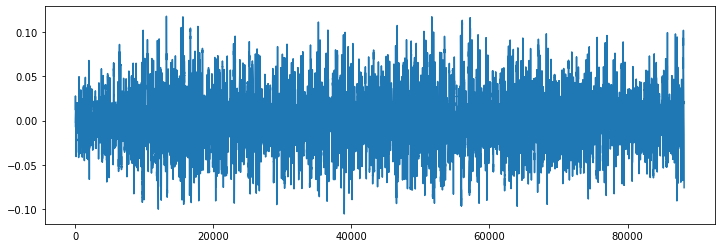

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,4))
plt.plot(librosa_audio_data)

In [3]:
# librosa converts singal to mono , whihc is of channel 1 - which means one feature for the model


In [4]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [5]:
wave_audio # two features because of its two channels like a stereo

array([[  193,   945],
       [  194,   890],
       [  197,   873],
       ...,
       [-2478, -2149],
       [-2604, -2102],
       [-2725, -2049]], dtype=int16)

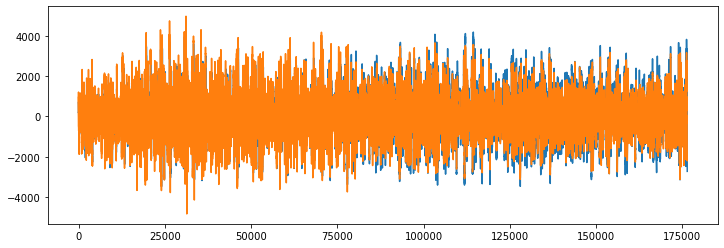

In [6]:
plt.figure(figsize = (12,4))
plt.plot(wave_audio)

In [7]:
# Mel-frequency capstral coefficients (MFCC) from audio-samples: These audio representations will allow us to identify features
#      for classification. MFCC summarizes the frequency distribution across the window size, so it is possible to analyze both 
#      frequency and time characteristics of the sound.

In [9]:
mfccs = librosa.feature.mfcc(y = librosa_audio_data, sr = librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)
# now all the audio signal is converted to array of dimensions, these are patterns acquired by time and frequency characteristics

(40, 173)


In [10]:
mfccs

array([[-3.38323578e+02, -3.28971130e+02, -3.23001953e+02, ...,
        -3.07938965e+02, -3.08982025e+02, -3.02269623e+02],
       [ 1.18780708e+02,  1.20189026e+02,  1.30332764e+02, ...,
         1.58444626e+02,  1.55418091e+02,  1.49917801e+02],
       [ 1.11874640e+00, -4.25587606e+00, -7.65222359e+00, ...,
        -8.10527420e+00, -6.55778027e+00, -3.58296800e+00],
       ...,
       [-3.23124170e+00, -4.73365355e+00, -4.67558193e+00, ...,
        -3.87401962e+00, -8.21519470e+00, -9.38625336e+00],
       [-6.31863928e+00, -5.73408604e+00, -4.33112812e+00, ...,
        -8.72558594e+00, -6.36162949e+00, -1.63728499e+00],
       [-1.01103127e-01, -1.45008004e+00,  7.76343822e-01, ...,
        -2.00129747e-01, -1.38255751e+00,  1.22451782e-02]], dtype=float32)

In [12]:
# feature extractor is a function that takes a file name 
def feature_extractor(file):
    audio, sample_rate = librosa.load(file, res_type = 'kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y = audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)
    
    return mfccs_scaled_features

In [14]:
import numpy as np
from tqdm import tqdm # to be able to see the progress
extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/', str(row["slice_file_name"]))
    final_class_labels = row['class']
    data = feature_extractor(file_name)
    extracted_features.append([data, final_class_labels])

3554it [03:10, 14.90it/s]C:\Users\golla\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8324it [07:07, 25.37it/s]C:\Users\golla\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\golla\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [07:27, 19.51it/s]


In [15]:
extracted_features_df = pd.DataFrame(extracted_features, columns = ['feature','class'])
extracted_features_df.head(5)

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01073, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [16]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [17]:
y = np.array(pd.get_dummies(y))

In [18]:
y.shape

(8732, 10)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
X_train.shape

(6985, 40)

In [21]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786109e+00,  2.8736603e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787205e+00, ...,
        -3.3844023e+00, -5.2119040e+00, -1.5936136e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491765e+00, -8.0537474e-01,  2.7793028e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335975e-01,  6.4766806e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530845e+00, -8.9652127e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400862e+00, -1.3321607e+00]], dtype=float32)